In [1]:
#importing the data

from keras.datasets import mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

Using TensorFlow backend.


In [2]:
#let's look at some of the Images of the data

import matplotlib.pyplot as plt
import numpy as np

for i in range(0,6):
    plt.subplot((331+i))
    random_num=np.random.randint(0,len(x_train))
    plt.imshow(x_train[random_num],cmap=plt.get_cmap('gray'))

In [3]:
#Preparing Dataset for Training!

#getting the shapes of columns and rows of an image
img_rows=x_train[0].shape[0]
img_cols=x_train[1].shape[0]


#reshaping the image value to (60000,28,28,1) since it is grayscale image

x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

#Determining the input_shape

input_shape=(img_rows,img_cols,1)

#changing to float32 datatype!
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")

#Normalizing the values of an image from 0 to 1 rather than 0-255 pixel values to ease the operation
x_train/=255
x_test/=255


print("x_traing_shape",x_train.shape)
print(x_train.shape[0],"training samples")
print(x_test.shape[0],"testing samples")

x_traing_shape (60000, 28, 28, 1)
60000 training samples
10000 testing samples


In [4]:
#ONE HOT ENCODING!

from keras.utils import np_utils

y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
print(num_classes)


10


In [5]:
#Model


import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D,MaxPooling2D
from keras import backend as K
from keras.optimizers import SGD


model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=SGD(0.01),metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [6]:
#Train our Model
epochs=10
batch_size=32

predictions=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print("Test loss",score[0])
print("Test Accuracy",score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 195s 3ms/step - loss: 0.5821 - acc: 0.8185 - val_loss: 0.1914 - val_acc: 0.9419
Epoch 2/10
60000/60000 [==============================] - 197s 3ms/step - loss: 0.2768 - acc: 0.9165 - val_loss: 0.1346 - val_acc: 0.9581
Epoch 3/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.2065 - acc: 0.9381 - val_loss: 0.1019 - val_acc: 0.9689
Epoch 4/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1617 - acc: 0.9519 - val_loss: 0.0784 - val_acc: 0.9756
Epoch 5/10
60000/60000 [==============================] - 201s 3ms/step - loss: 0.1326 - acc: 0.9606 - val_loss: 0.0677 - val_acc: 0.9784
Epoch 6/10
60000/60000 [==============================] - 198s 3ms/step - loss: 0.1155 - acc: 0.9653 - val_loss: 0.0563 - val_acc: 0.9816
Epoch 7/10
60000/60000 [==============================] - 200s 3ms/step - loss: 0.1028 - acc: 0.9693 - val_loss: 0.0523 - 

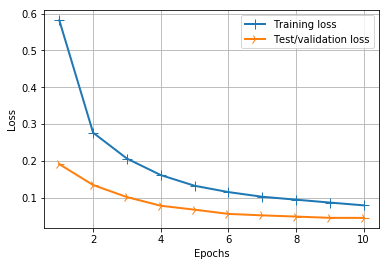

In [11]:
#Loss Maps of Test/validation data and Training data vs Epochs
import matplotlib.pyplot as plt

history_dict=predictions.history

loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,loss_values,label="Training loss")
line2=plt.plot(epochs,val_loss_values,label="Test/validation loss")

plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid('True')
plt.legend()
plt.show()

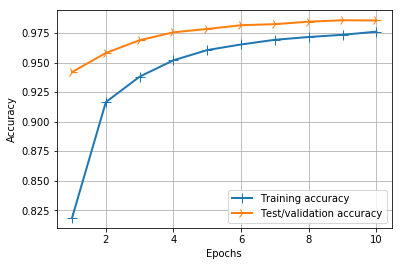

In [15]:
#Accuracy maps for Training data and Test/validation data vs Epochs
history_dict=predictions.history

accuracy_values=history_dict['acc']
val_acc_values=history_dict['val_acc']
epochs=range(1,len(loss_values)+1)

line1=plt.plot(epochs,accuracy_values,label="Training accuracy")
line2=plt.plot(epochs,val_acc_values,label="Test/validation accuracy")

plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid('True')
plt.legend()
plt.show()